# Hastie Data - 2 Class

In [8]:
from sklearn.datasets import make_hastie_10_2

x, y = make_hastie_10_2(n_samples=6000)

In [49]:
(y>=0).mean()

0.49216666666666664

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=22)

In [14]:
a.shape, b.shape

((4500, 10), (1500, 10))

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,
    n_jobs=-1,
)

clf.fit(x_train, y_train)
y_pred_proba = clf.predict_proba(x_test)[:,1]

In [25]:
y_pred_proba.shape

(1500,)

In [51]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

auc_values = auc(fpr, tpr)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


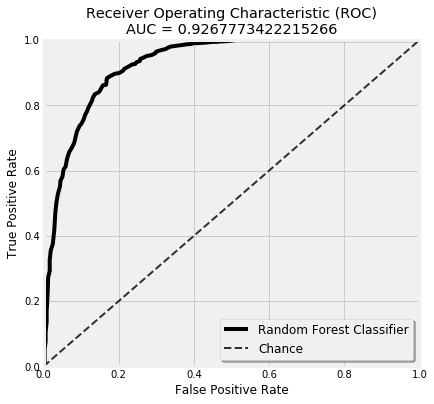

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

pd.DataFrame(
    {
        'FPR': fpr,
        'TPR': tpr
    }
).set_index('FPR')['TPR'].plot(
    title=f'Receiver Operating Characteristic (ROC)\nAUC = {auc_values}',
    label='Random Forest Classifier',
    kind='line',
    xlim=(0,1),
    ylim=(0,1),
    color='k',
    ax=ax
)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

# ROC Curves (Link blow)

In a classification problem, we may decide to predict the class values directly.

Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

Put another way, it plots the false alarm rate versus the hit rate.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

bootstrap_options = [True, False]

for bootstrap_option in bootstrap_options:
    
    clf = RandomForestClassifier(
        n_estimators=200,
        bootstrap=bootstrap_option,
        n_jobs=-1,
    )

    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

    auc_values = auc(fpr, tpr)
    
    print(f'AUC @ bootstrap = {bootstrap_option}; {auc_values:.3f}')

AUC @ bootstrap = True; 0.938
AUC @ bootstrap = False; 0.926


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


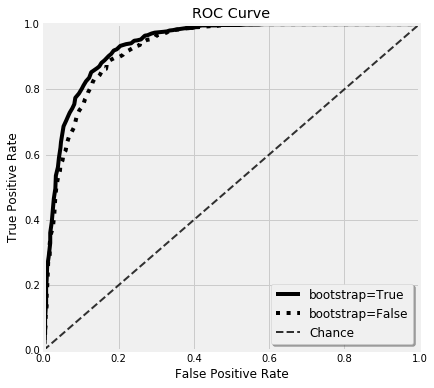

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

for i, bootstrap_option in enumerate(bootstrap_options):
    
    clf = RandomForestClassifier(
        n_estimators=100,
        bootstrap=bootstrap_option,
        n_jobs=-1,
    )

    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

    auc_values = auc(fpr, tpr)
    
    pd.DataFrame(
        {
            'FPR': fpr,
            'TPR': tpr
        }
    ).set_index('FPR')['TPR'].plot(
        title=f'ROC Curve',
        label=f'bootstrap={bootstrap_option}',
        kind='line',
        xlim=(0,1),
        ylim=(0,1),
        color='k',
        linestyle=['-', ':'][i],
        ax=ax
    )

    if i == 1:
        ax.plot(
            [0, 1], [0, 1], 
            linestyle='--', 
            lw=2, color='k',
            label='Chance', alpha=.8
        )

    ax.legend(ncol=1, fontsize='large', shadow=True)

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.show()